In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time

In [2]:
with open("A:/study materials data science/projects/ISOC Projects/archive/kddcup.names", 'r') as f: 
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate"""
  
columns =[] 
for c in cols.split(', '): 
    if(c.strip()): 
       columns.append(c.strip()) 
columns.append('target') 
print(len(columns)) 

42


In [4]:
with open("A:/study materials data science/projects/ISOC Projects/archive/training_attack_types", 'r') as f: 
    print(f.read()) 

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [5]:
attacks_types = { 
    'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
} 

In [6]:
path = "A:/study materials data science/projects/ISOC Projects/archive/kddcup.data_10_percent/kddcup.data_10_percent"
df =pd.read_csv(path, names = columns) 
  
# Adding Attack Type column 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]]) 
df.head() 
 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df.shape 

(494021, 43)

In [8]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
num_cols = df._get_numeric_data().columns 
  
cate_cols = list(set(df.columns)-set(num_cols)) 
cate_cols.remove('target') 
cate_cols.remove('Attack Type') 
  
cate_cols 
 

['flag', 'service', 'protocol_type']

In [10]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [11]:
unique_values = df['protocol_type'].unique()
unique_values

array(['tcp', 'udp', 'icmp'], dtype=object)

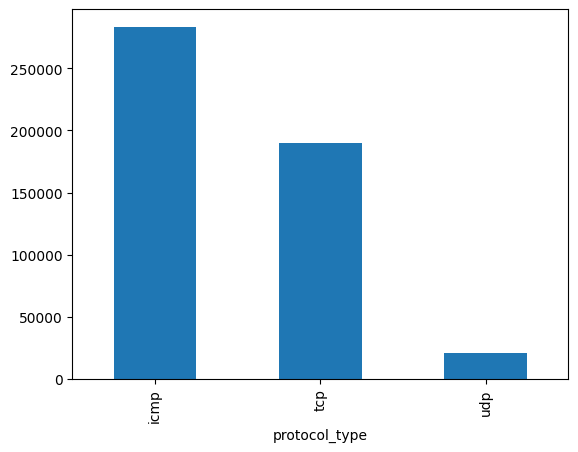

In [12]:
df['protocol_type'].value_counts().plot(kind='bar')

plt.show()


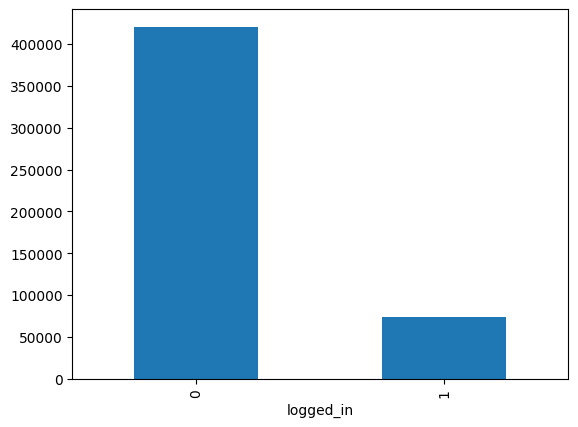

In [13]:
df['logged_in'].value_counts().plot(kind='bar')

plt.show()

In [14]:
unique_values_dict = {}
for column in df.columns:
    unique_values_dict[column] = df[column].unique()
unique_values_dict

{'duration': array([   0,    1,   79, ..., 2695, 2751,  120], dtype=int64),
 'protocol_type': array(['tcp', 'udp', 'icmp'], dtype=object),
 'service': array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
        'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
        'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
        'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
        'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
        'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
        'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
        'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
        'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
        'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
       dtype=object),
 'flag': array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
        'OTH', 'SH'], dtype=obje

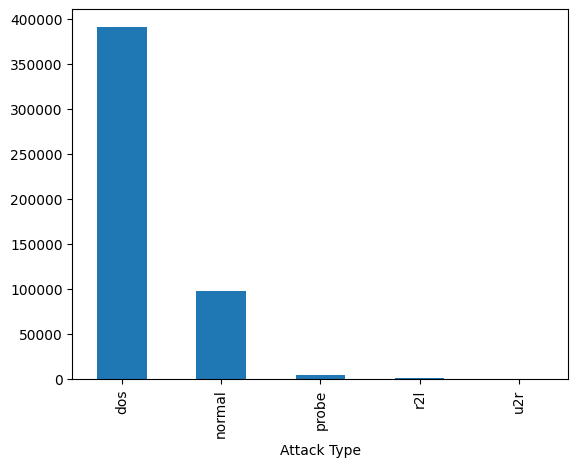

In [15]:
df['Attack Type'].value_counts().plot(kind='bar')

plt.show()

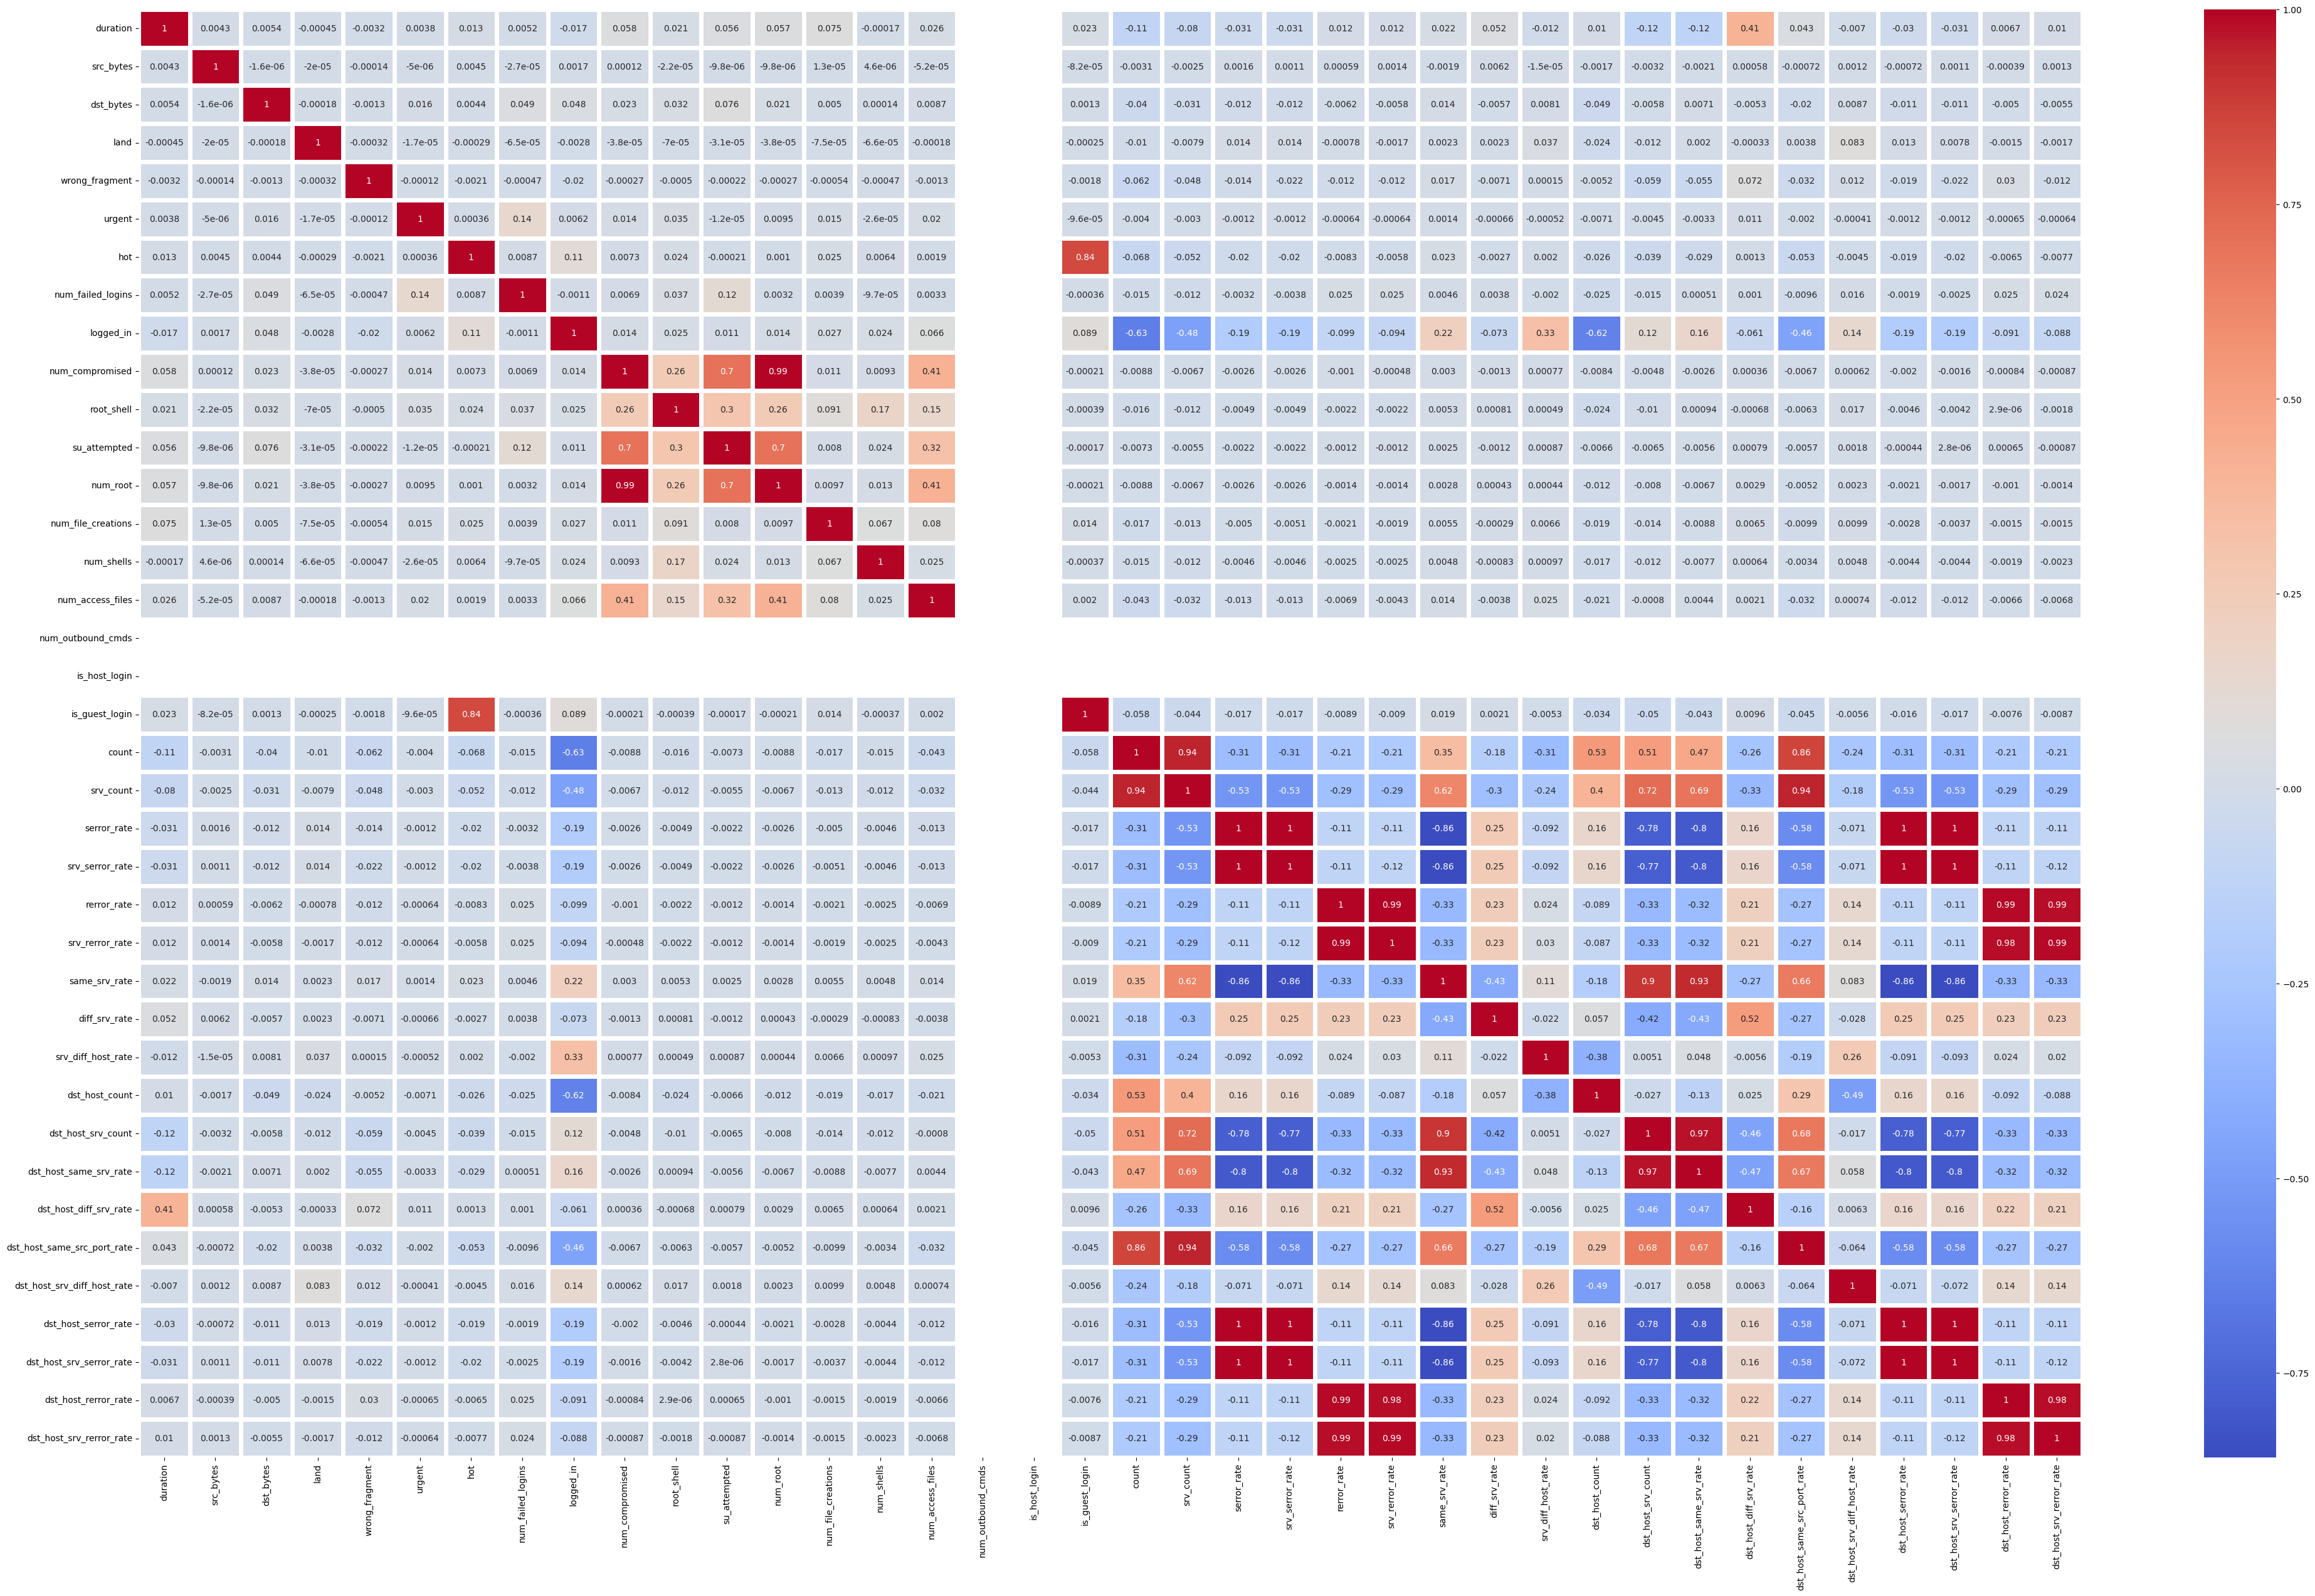

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select the columns you want for the heatmap, excluding non-numeric columns if necessary
heatmap_columns = df.select_dtypes(include=['float64', 'int64'])

# Set up the matplotlib figure
plt.figure(figsize=(50,30))

# Create a heatmap using seaborn
sns.heatmap(heatmap_columns.corr(), annot=True, cmap='coolwarm', linewidths=5)

# Show the plot
plt.show()


In [17]:
 

# This variable is highly correlated with num_compromised and should be ignored for analysis. 
#(Correlation = 0.9938277978738366) 
df.drop('num_root', axis = 1, inplace = True) 

# This variable is highly correlated with serror_rate and should be ignored for analysis. 
#(Correlation = 0.9983615072725952) 
df.drop('srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9947309539817937) 
df.drop('srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis. 
#(Correlation = 0.9993041091850098) 
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9869947924956001) 
df.drop('dst_host_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9821663427308375) 
df.drop('dst_host_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9851995540751249) 
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9865705438845669) 
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True) 



In [18]:
# protocol_type feature mapping 
pmap = {'icmp':0, 'tcp':1, 'udp':2} 
df['protocol_type'] = df['protocol_type'].map(pmap) 

In [19]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.00,9,9,0.0,0.11,0.00,normal.,normal
1,0,1,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal.,normal
2,0,1,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.00,29,29,0.0,0.03,0.00,normal.,normal
3,0,1,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.00,39,39,0.0,0.03,0.00,normal.,normal
4,0,1,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.00,49,49,0.0,0.02,0.00,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal.,normal
494017,0,1,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal.,normal
494018,0,1,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal.,normal
494019,0,1,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal.,normal


In [20]:
# flag feature mapping 
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
df['flag'] = df['flag'].map(fmap) 

In [21]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.00,9,9,0.0,0.11,0.00,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.00,29,29,0.0,0.03,0.00,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.00,39,39,0.0,0.03,0.00,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.00,49,49,0.0,0.02,0.00,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,http,0,310,1881,0,0,0,0,...,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal.,normal
494017,0,1,http,0,282,2286,0,0,0,0,...,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal.,normal
494018,0,1,http,0,203,1200,0,0,0,0,...,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal.,normal
494019,0,1,http,0,291,1200,0,0,0,0,...,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal.,normal


Remove irrelevant features such as ‘service’ before modelling

In [22]:
df.drop('service', axis = 1, inplace = True) 

In [23]:
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.00,9,9,0.0,0.11,0.00,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.00,29,29,0.0,0.03,0.00,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.00,39,39,0.0,0.03,0.00,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.00,49,49,0.0,0.02,0.00,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal.,normal
494017,0,1,0,282,2286,0,0,0,0,0,...,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal.,normal
494018,0,1,0,203,1200,0,0,0,0,0,...,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal.,normal
494019,0,1,0,291,1200,0,0,0,0,0,...,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal.,normal


In [24]:
 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 



In [25]:


 
# Splitting the dataset 
df = df.drop(['target', ], axis = 1) 
print(df.shape) 

# Target variable and train set 
y = df[['Attack Type']] 
X = df.drop(['Attack Type', ], axis = 1) 

sc = MinMaxScaler() 
X = sc.fit_transform(X) 

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape) 




(494021, 33)
(330994, 32) (163027, 32)
(330994, 1) (163027, 1)


In [26]:
 
# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 

clfg = GaussianNB() 
start_time = time.time() 
clfg.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  0.5207903385162354


In [27]:
 
start_time = time.time() 
y_test_pred = clfg.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  0.5499653816223145


In [28]:
 
print("Train score is:", clfg.score(X_train, y_train)) 
print("Test score is:", clfg.score(X_test, y_test)) 



Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


In [29]:
 
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier 

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4) 
start_time = time.time() 
clfd.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  1.3218188285827637


In [30]:
 
start_time = time.time() 
y_test_pred = clfd.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  0.05626320838928223


In [31]:
 
print("Train score is:", clfd.score(X_train, y_train)) 
print("Test score is:", clfd.score(X_test, y_test)) 



Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


In [32]:
 
from sklearn.ensemble import RandomForestClassifier 

clfr = RandomForestClassifier(n_estimators = 30) 
start_time = time.time() 
clfr.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  8.485092401504517


In [33]:
 
start_time = time.time() 
y_test_pred = clfr.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  0.6655497550964355


In [34]:
 
print("Train score is:", clfr.score(X_train, y_train)) 
print("Test score is:", clfr.score(X_test, y_test)) 



Train score is: 0.9999788515803912
Test score is: 0.9996810344298798


In [35]:
 
from sklearn.svm import SVC 

clfs = SVC(gamma = 'scale') 
start_time = time.time() 
clfs.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  317.284334897995


In [36]:
         
start_time = time.time() 
y_test_pred = clfs.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  213.1900200843811


In [37]:
 
print("Train score is:", clfs.score(X_train, y_train)) 
print("Test score is:", clfs.score(X_test, y_test)) 



Train score is: 0.9987462008374774
Test score is: 0.9987854772522343


In [38]:
 
from sklearn.linear_model import LogisticRegression 

clfl = LogisticRegression(max_iter = 1200000) 
start_time = time.time() 
clfl.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  7.316575288772583


In [39]:
 
start_time = time.time() 
y_test_pred = clfl.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  0.05902361869812012


In [40]:
 
print("Train score is:", clfl.score(X_train, y_train)) 
print("Test score is:", clfl.score(X_test, y_test)) 



Train score is: 0.9935044139772926
Test score is: 0.9934796076723488


In [41]:
 
from sklearn.ensemble import GradientBoostingClassifier 

clfg = GradientBoostingClassifier(random_state = 0) 
start_time = time.time() 
clfg.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  497.90941166877747


In [42]:
 
start_time = time.time() 
y_test_pred = clfg.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  3.260446548461914


In [43]:
 
print("Train score is:", clfg.score(X_train, y_train)) 
print("Test score is:", clfg.score(X_test, y_test)) 



Train score is: 0.9979304760811374
Test score is: 0.9977181693829856


<BarContainer object of 6 artists>

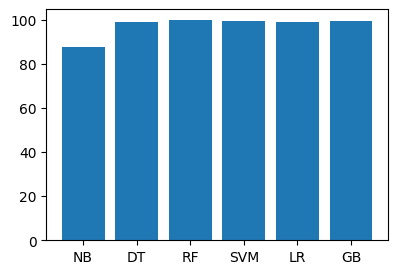

In [44]:
 
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB'] 
values = [87.951, 99.058, 99.997, 99.875, 99.352, 99.793] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 


<BarContainer object of 6 artists>

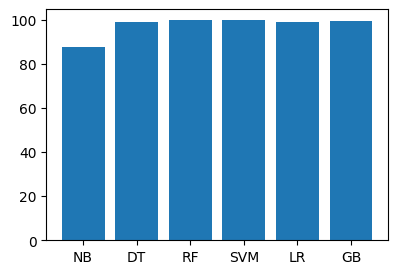

In [45]:
 
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB'] 
values = [87.903, 99.052, 99.969, 99.879, 99.352, 99.771] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 



<BarContainer object of 6 artists>

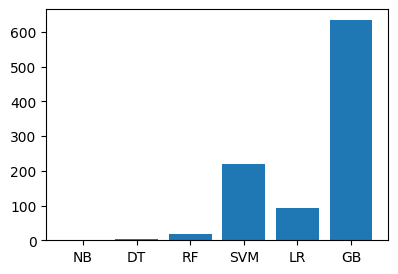

In [46]:
 
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB'] 
values = [1.11452, 2.44087, 17.08491, 218.26840, 92.94222, 633.229] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 



<BarContainer object of 6 artists>

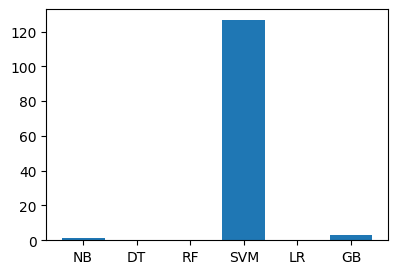

In [47]:
 
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB'] 
values = [1.54329, 0.14877, 0.199471, 126.50875, 0.09605, 2.95039] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 

